STUDENCE PERFORMANCE PREDICTION

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

Load Dataset

In [2]:
df = pd.read_csv("../data/student_data.csv")
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


Chech shape

In [3]:
df.shape

(200, 6)

Data Exploration

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


Checking Missing Values

In [5]:
df.isnull().sum()

student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

Create Target Variable

In [14]:
df["result"] = df["exam_score"].apply(lambda x:1 if x>=30 else 0)
df['result'].value_counts()

result
1    144
0     56
Name: count, dtype: int64

Select Features

In [21]:
X = df[['hours_studied','sleep_hours','attendance_percent','previous_scores']]
y = df['result']

Train-Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Feature Scaling

In [23]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training a Model

Logistic Regression

In [24]:
log_model = LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Results")
print(classification_report(y_test, y_pred_log))

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.90      0.95        29

    accuracy                           0.93        40
   macro avg       0.89      0.95      0.91        40
weighted avg       0.94      0.93      0.93        40



Confusion Matrix

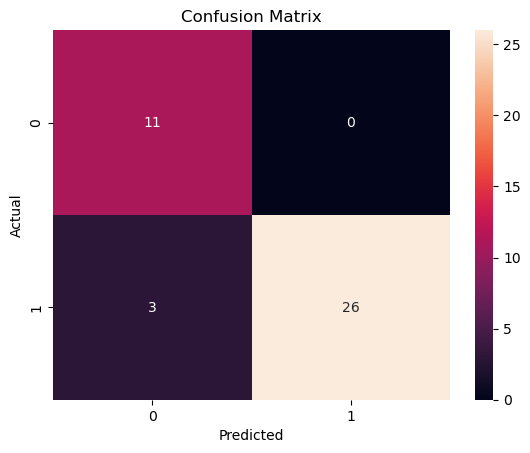

In [26]:
cm = confusion_matrix(y_test, y_pred_log)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Save model (later for Streamlit)

In [27]:
import joblib

joblib.dump(log_model, "../models/student_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")

['../models/scaler.pkl']